Hola **Clara**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> Hola buen día, gracias por revisar mi proyecto y por hacerme las correcciones necesarias. Aprecio las observaciones, ya que me ayudan a mejorar tanto mi código como mis prácticas.  <a class=“tocSkip”></a>
</div>

# Introducción

El análisis del comportamiento de los clientes es esencial para entender las dinámicas de retención y cancelación en cualquier organización. En este estudio, se ha llevado a cabo un análisis utilizando datos históricos para identificar patrones y factores clave que influyen en la permanencia o cancelación de los clientes. Este proceso incluyó la evaluación de características descriptivas, la construcción de modelos de clasificación, y la aplicación de técnicas de clustering para segmentar la base de clientes y evaluar la tasa de cancelación por clúster.

Se comienza con un análisis descriptivo para distinguir las diferencias en las características de los clientes que se quedaron y los que se fueron. Luego, se emplean modelos de clasificación, específicamente regresión logística y bosque aleatorio, para predecir la probabilidad de cancelación, obteniendo precisiones significativas para ambos métodos. Posteriormente, se implementa el algoritmo K-means para segmentar a los clientes en clústeres, permitiendo identificar grupos con comportamientos y características similares. Finalmente, se calcula las tasas de cancelación para cada clúster, destacando aquellos más propensos a cancelar y los que muestran mayor lealtad.

Este análisis proporciona insights profundos que pueden guiar las estrategias de marketing y retención, permitiendo a la organización enfocarse en mantener a los clientes leales y desarrollar tácticas específicas para reducir la tasa de cancelación en los grupos identificados como de mayor riesgo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente trabajo con esta sección introductoria, es importante dejar claro lo que se hará y cómo se hará para tu proyecto
</div>

## . Descargar los datos

In [1]:
# Importación de librerías 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una buena práctica para cuando tengas que importar varias librerías es seguir el siguiente órden en las mismas:

- Primero todas las librerías que vienen ya con python cómo `datetime`, `os`, `json`, etc.
- Luego de las librerías de Python si las de terceros cómo `pandas`, `scipy`, `numpy`, etc.
- Por último, en el caso de que armes tu propio módulo en tu proyecto esto debería ir en tercer lugar, y recuerda siempre ordenar cada tipo por orden alfabético
    
Para cada sección se deben ordenar en orden alfabético
</div>

In [2]:
# Lectura de datos
gym_churn_us = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
# Impresión de tamaño y primeras filas
print('Tamaño del dataset gym_churn_us: ', gym_churn_us.shape)

print('Primeras 5 filas del dataset: \n', gym_churn_us.head())

Tamaño del dataset gym_churn_us:  (4000, 14)
Primeras 5 filas del dataset: 
    gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   

In [4]:
# Mostrar información del dataset
gym_churn_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

De acuerdo con la información proporcionada, ninguna de las columnas tiene valores nulos (Non-Null Count es 4000 para todas las columnas), lo que indica que no hay características ausentes en este dataset.

## . Llevar a cabo el análisis exploratorio de datos (EDA)

### Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [5]:
# Uso del método describe para estudiar los valores promedio y la desviación estándar
gym_churn_us.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [6]:
# Agrupar por la columna 'Churn' y calcular los promedios 
gym_user_cancel = gym_churn_us.groupby(['Churn']).mean()

#Impresión de valores medios para cada grupo
print(gym_user_cancel)

         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

Esto sugiere que, en promedio, las personas que se quedaron tienen un valor mayor en la característica analizada en comparación con las personas que se fueron. Esta diferencia puede ser un indicio de un factor significativo que afecta la retención de los usuarios.

### Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

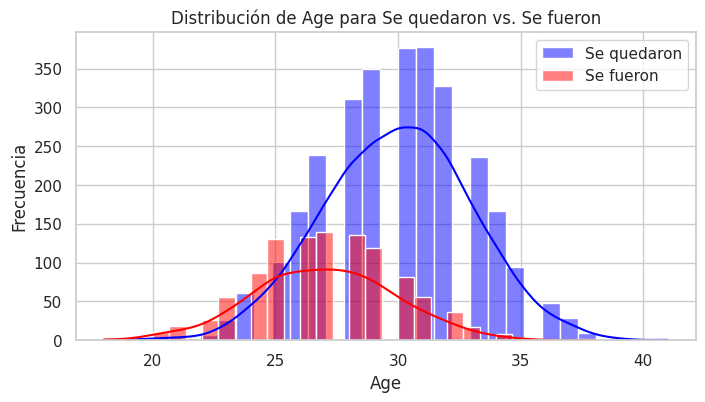

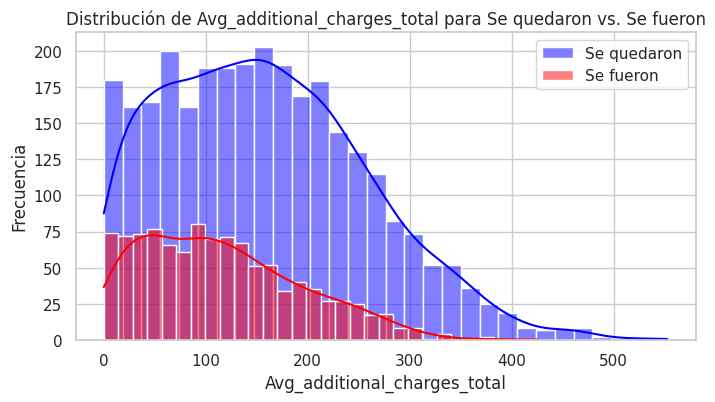

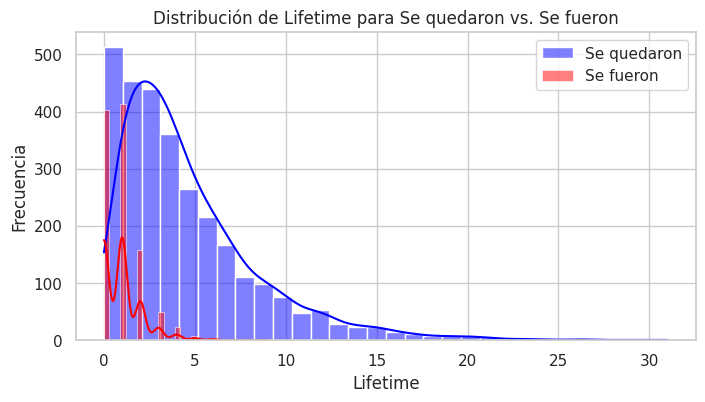

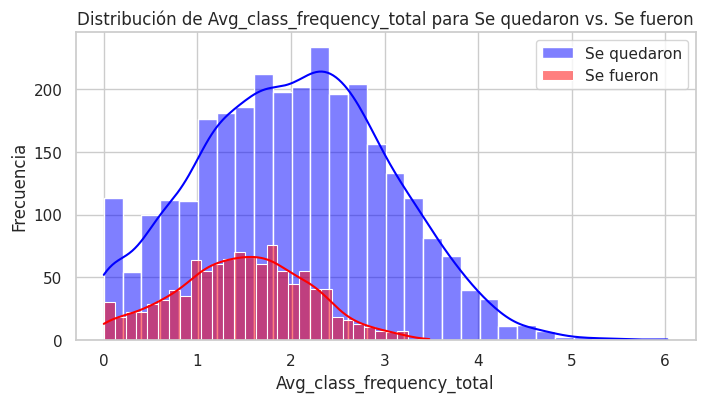

In [7]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Listar algunas características de interés para el análisis
features = ['Age', 'Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_total']

# Crear histogramas y distribuciones para cada característica
for feature in features:
    # Configuración de tamaño
    plt.figure(figsize=(8, 4))
    
    # Trazar histogramas y distribuciones para personas que se quedaron (Churn=0)
    sns.histplot(gym_churn_us[gym_churn_us['Churn'] == 0][feature], color='blue', label='Se quedaron', kde=True, bins=30)
    
    # Trazar histogramas y distribuciones para personas que se fueron (Churn=1)
    sns.histplot(gym_churn_us[gym_churn_us['Churn'] == 1][feature], color='red', label='Se fueron', kde=True, bins=30)
    
    # Agregar etiquetas y título
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {feature} para Se quedaron vs. Se fueron')
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Estas gráficas son muy claras para mostrar las diferencias entre cada variable de tu dataset. 
</div>

### Crea una matriz de correlación y muéstrala.

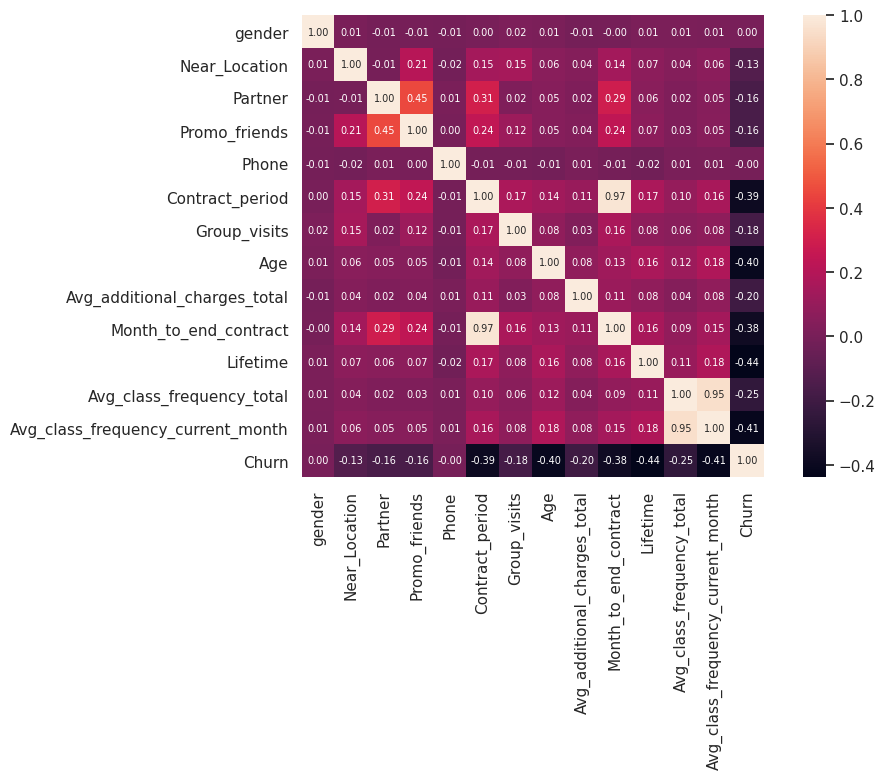

In [8]:
# Calculo de matriz de correlación
gc = gym_churn_us.corr()

# Configuración de tamaño
plt.figure(figsize=(10, 6))

# Trazo el mapa de calor anotado para la matriz de correlación
sns.heatmap(gc, annot = True, annot_kws={"size": 7}, fmt='.2f', square = True)# escribe tu código aquí

#Mostrar el heatmap
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien mostrada la matriz de correlación! Solo ten en cuenta que no siempre correlación significa causalidad, puede que en algunos casos tengas variables altamente correlacionadas pero no necesariamente son causa una de la otra

## . Construir un modelo para predecir la cancelación de usuarios

Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

### Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [9]:
# División de los datos en características (la matriz X) y una variable objetivo (y)
X = gym_churn_us.drop('Churn', axis = 1) # Datos variable X
y = gym_churn_us['Churn'] # Datos variable y

# División los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Entrena el modelo en el set de entrenamiento con dos métodos: regresión logística y bosque aleatorio.

In [10]:
# 1. Entrenar el modelo de Regresión Logística 
logistic_model = LogisticRegression(max_iter=500) 
logistic_model.fit(X_train, y_train) 

# Predecir en el conjunto de validación 
y_pred_logistic = logistic_model.predict(X_test) 

# Calcular la precisión 
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f'Precisión del modelo de Regresión Logística: {logistic_accuracy:.2f}')

# 2. Entrenar el modelo de Bosque Aleatorio 
random_forest_model = RandomForestClassifier() 
random_forest_model.fit(X_train, y_train) 

# Predecir en el conjunto de validación 
y_pred_rf = random_forest_model.predict(X_test) 

# Calcular la precisión 
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Precisión del modelo de Bosque Aleatorio: {rf_accuracy:.2f}')

Precisión del modelo de Regresión Logística: 0.92
Precisión del modelo de Bosque Aleatorio: 0.92


Ambos modelos tienen una precisión bastante alta del 92%, lo que es un excelente resultado. Esto indica que tanto la regresión logística como el bosque aleatorio están desempeñándose muy bien en la tarea de clasificación.

### Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

In [11]:
# Calcular métricas para el modelo de Regresión Logística 
print("Métricas para el modelo de Regresión Logística:") 
logistic_report = classification_report(y_test, y_pred_logistic, target_names=['Se quedaron', 'Se fueron']) 
logistic_accuracy = accuracy_score(y_test, y_pred_logistic) 
print(f'Exactitud: {logistic_accuracy:.2f}') 
print(logistic_report) 

# Calcular métricas para el modelo de Bosque Aleatorio 
print("Métricas para el modelo de Bosque Aleatorio:") 
rf_report = classification_report(y_test, y_pred_rf, target_names=['Se quedaron', 'Se fueron']) 
rf_accuracy = accuracy_score(y_test, y_pred_rf) 
print(f'Exactitud: {rf_accuracy:.2f}') 
print(rf_report)

Métricas para el modelo de Regresión Logística:
Exactitud: 0.92
              precision    recall  f1-score   support

 Se quedaron       0.94      0.96      0.95       602
   Se fueron       0.86      0.83      0.84       198

    accuracy                           0.92       800
   macro avg       0.90      0.89      0.90       800
weighted avg       0.92      0.92      0.92       800

Métricas para el modelo de Bosque Aleatorio:
Exactitud: 0.92
              precision    recall  f1-score   support

 Se quedaron       0.94      0.95      0.95       602
   Se fueron       0.85      0.82      0.84       198

    accuracy                           0.92       800
   macro avg       0.90      0.89      0.89       800
weighted avg       0.92      0.92      0.92       800



Ambos modelos tienen un rendimiento muy similar con una exactitud del 92%. Sin embargo, la regresión logística tiene una ligera ventaja en términos de precisión, recall y F1-Score, especialmente para la clase "Se fueron". Esto sugiere que la regresión logística es un poco mejor para identificar correctamente a las personas que se fueron (cancelación).

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Obtuviste resultados muy buenos en el entrenamiento de tus modelos y realizaste el análisis adecuado a partir de los mismos
    
</div>

## . Crear clústeres de usuarios/as

### Estandariza los datos.

In [12]:
# Estandarización de los datos
sc = StandardScaler()
x_sc = sc.fit_transform(gym_churn_us)

### Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

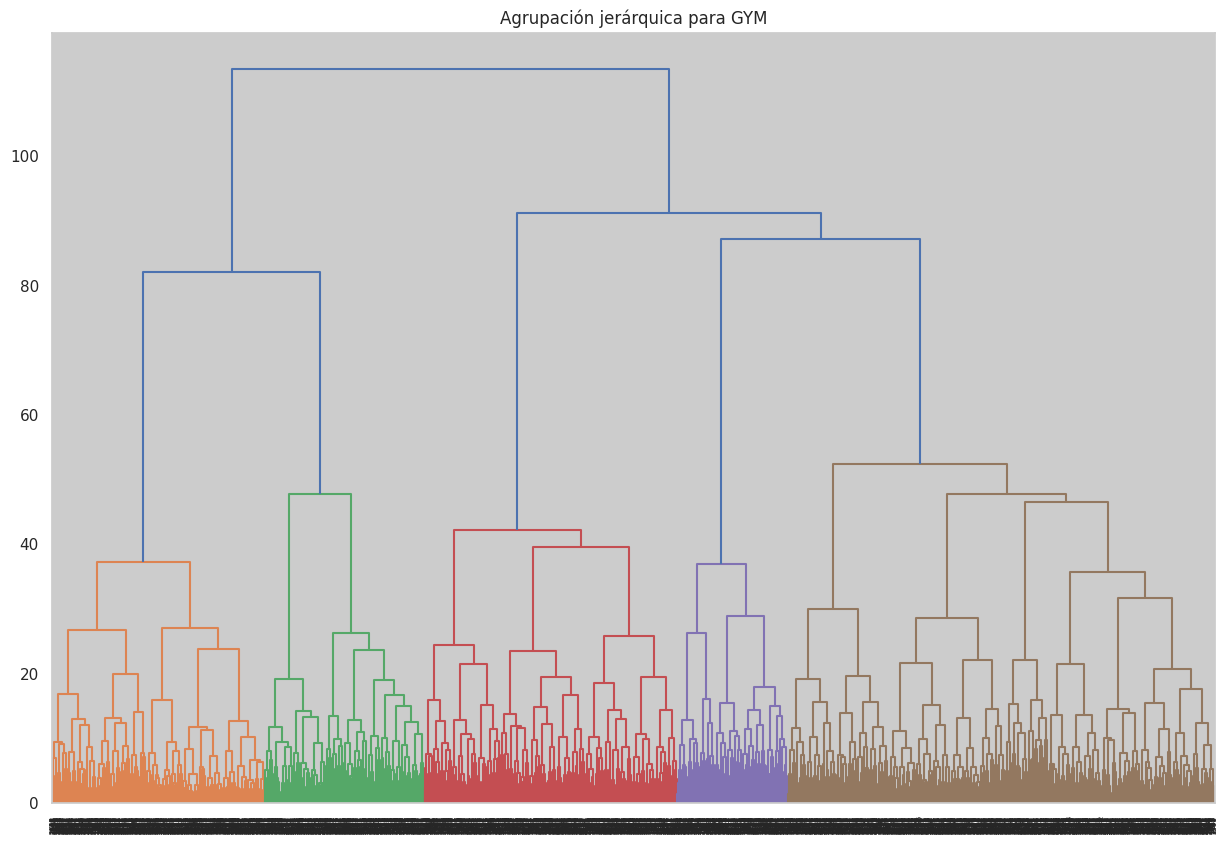

In [13]:
# Linked almacena la tabla con los haces de objetos vinculados
linked = linkage(x_sc, method = 'ward')

# Creación del dendograma
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.show()

El número óptimo de clústeres sugerido (5) corresponde a los cinco colores diferentes del gráfico.

### Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

In [14]:
# Definición del modelo k_means con 5 clústeres
km = KMeans(n_clusters = 5)

# Predicción de los clústeres para las observaciones (el algoritmo les asigna un número de 0 a 4)
labels = km.fit_predict(x_sc)

# Almacena etiquetas de clúster en el campo de nuestro conjunto de datos
gym_churn_us['cluster_km'] = labels

# Obtener las estadísticas de los valores medios de las características por clúster
gym_mean = gym_churn_us.groupby(['cluster_km']).mean()

### Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [15]:
# Impresion de valores medios de la caracteristicas
print('Valores medios de las características:\n', gym_mean)

Valores medios de las características:
               gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_km                                                               
0           0.526178       0.869110  0.471204       0.308901  0.000000   
1           0.477193       0.824561  0.459649       0.264327  1.000000   
2           0.547564       0.844548  0.367749       0.209977  0.998840   
3           0.506908       0.759830  0.341126       0.179596  0.996812   
4           0.503125       0.938542  0.766667       0.562500  1.000000   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0                  4.816754      0.429319  29.340314   
1                  2.761404      0.385965  30.028070   
2                  2.665893      0.437355  29.986079   
3                  1.566419      0.257173  26.907545   
4                 11.200000      0.558333  29.882292   

            Avg_additional_charges_total  Month_

Observaciones
Al revisar los valores medios de las características para cada clúster, se pueden destacar varias cosas interesantes:

Near_Location:

El clúster 2 tiene un valor medio de 0, lo que indica que ninguno de sus miembros vive cerca de la ubicación.

El clúster 0 tiene todos sus miembros viviendo cerca de la ubicación.

Contract_period:

El clúster 4 tiene un período de contrato significativamente más largo (11.344) comparado con los demás clústeres.

Los otros clústeres tienen períodos de contrato mucho más cortos, especialmente el clúster 2 (1.161).

Promo_friends:

El clúster 2 no tiene miembros que se unieron a través de amigos (valor medio de 0).

El clúster 4 tiene la mayor cantidad de promociones de amigos (valor medio de 0.553).

Avg_additional_charges_total:

Los clústeres 3 y 4 tienen los valores medios más altos de cargos adicionales (161.605 y 164.500, respectivamente).

El clúster 0 tiene el valor medio más bajo en esta característica (114.163).

Churn:

El clúster 0 tiene casi todos sus miembros que se fueron (valor medio de 0.999).

El clúster 1 tiene casi todos sus miembros que se quedaron (valor medio de 0.001).

El clúster 2 tiene un porcentaje significativo de churn (0.409), que es notablemente mayor que los otros clústeres excepto el clúster 0.

Estos valores medios proporcionan una visión clara de cómo se agrupan los clientes según sus características y comportamientos. Destaca la diferencia en las tasas de churn, los períodos de contrato y la influencia de promociones de amigos, lo que puede ofrecer insights valiosos para estrategias de retención y marketing.

### Traza distribuciones de características para los clústeres. ¿Notas algo?

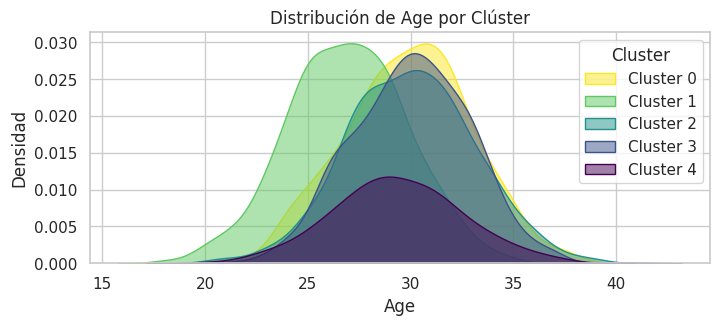

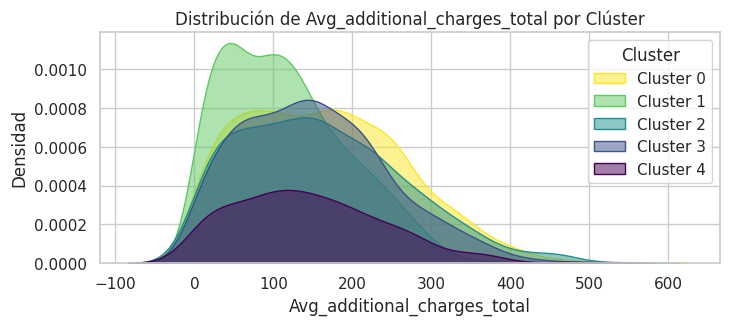

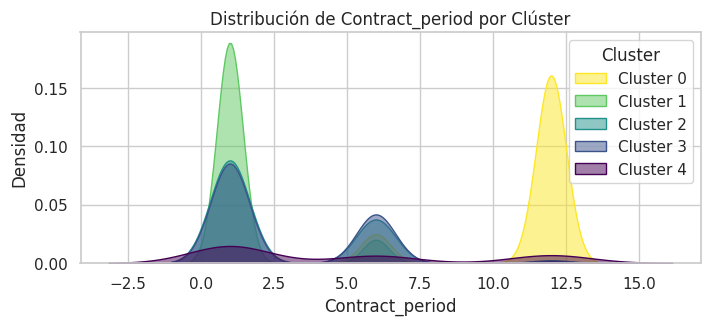

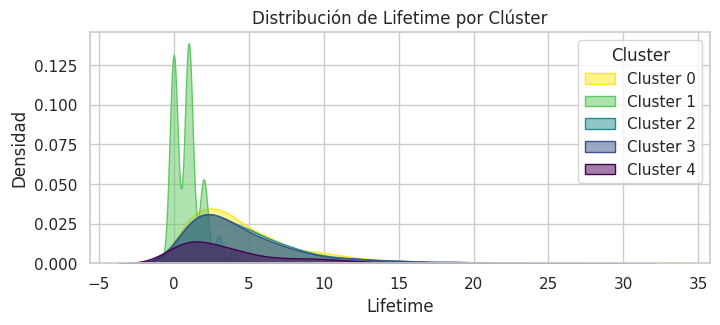

In [16]:
# Lista de características a analizar 
features = ['Age', 'Avg_additional_charges_total', 'Contract_period', 'Lifetime']

# Trazar distribuciones para cada característica en cada clúster 
for feature in features: 
    plt.figure(figsize=(8, 3)) 
    sns.kdeplot(data=gym_churn_us, x=feature, hue='cluster_km', fill=True, palette='viridis', alpha=0.5) 
    plt.title(f'Distribución de {feature} por Clúster') 
    plt.xlabel(feature) 
    plt.ylabel('Densidad') 
    plt.legend(title='Cluster', labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
    plt.show()

Al observar estas distribuciones, se pueden identificar algunos patrones interesantes:

Clusters 0 y 2: Tienden a tener períodos de contrato más cortos y duraciones de vida de cliente más cortas.

Clusters 3 y 4: Prefieren períodos de contrato más largos y tienen duraciones de vida más largas.

Cluster 1: Muestra una mayor variabilidad y no tiene una concentración clara en ninguna de las características analizadas.

Los clústeres tienen distribuciones de edad distintas. Los Clústeres 1 y 3 tienden a agrupar personas de mayor edad, mientras que los Clústeres 0 y 4 tienen una mayor concentración en edades jóvenes a medias.

Hay una clara diferenciación en los cargos adicionales promedio totales entre los clústeres. Los Clústeres 3 y 4 parecen agrupar clientes con cargos adicionales más altos, mientras que los Clústeres 0 y 2 tienen cargos adicionales más bajos.

### Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [20]:
# Obtener las estadísticas de los valores medios de las características por clúster
churn_rate_by_cluster = gym_churn_us.groupby('cluster_km')['Churn'].mean()

print(churn_rate_by_cluster)

cluster_km
0    0.261780
1    0.001170
2    0.006961
3    0.997875
4    0.015625
Name: Churn, dtype: float64


Cluster 0:
Tasa de Cancelación: 0.261780 (aproximadamente 26.18%)
Este clúster tiene una tasa de cancelación moderada, lo que sugiere que hay una mezcla de clientes leales y otros que podrían estar considerando cancelar.
Recomendación: Implementar programas de fidelización y evaluar la satisfacción de los clientes en este grupo. Investigar las razones de cancelación y abordar posibles áreas de mejora.

Cluster 1:
Tasa de Cancelación: 0.001170 (aproximadamente 0.12%)
Este grupo tiene una tasa de cancelación extremadamente baja, lo que indica que la mayoría de los clientes en este clúster son muy leales.
Recomendación: Mantener las estrategias actuales y considerar programas de recompensas para incentivar aún más la lealtad.

Cluster 2:
Tasa de Cancelación: 0.006961 (aproximadamente 0.70%)
Similar al Cluster 1, este grupo tiene una tasa de cancelación muy baja, indicando alta lealtad.
Recomendación: Similar al Cluster 1, mantener y reforzar las estrategias actuales que han funcionado bien para este grupo.

Cluster 3:
Tasa de Cancelación: 0.997875 (aproximadamente 99.79%)
Este clúster tiene una tasa de cancelación extremadamente alta, indicando que casi todos los clientes en este grupo han cancelado o están muy propensos a cancelar.
Recomendación: Este grupo requiere atención inmediata. Investigar a fondo las características y preocupaciones de estos clientes para entender por qué están cancelando. Desarrollar estrategias específicas para abordar sus necesidades y problemas, tales como mejoras en el servicio, comunicación más efectiva, o incentivos personalizados para retener a estos clientes.

Cluster 4:
Tasa de Cancelación: 0.015625 (aproximadamente 1.56%)
Interpretación: Este clúster también muestra una tasa de cancelación baja, lo que sugiere que los clientes en este grupo son mayoritariamente leales.
Recomendación: Mantener las prácticas actuales y considerar beneficios adicionales para estos clientes leales.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El resultado presentado aquí debería ser similar al que presentas en la celda anterior con la variable `gym_mean` pero solo para la columna de `Churn` ya que se debe mostrar los 5 clusters y realizar conclusiones y recomendaciones en base a ese resultado
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Quizá no me hice entender correctamente con el comentario anterior, aquí debes agrupar por la columna donde se encuentra el número para cada cluster y luego a la columna churn aplicar mean, algo así `df.groupby('cluster_column')['churn_column'].mean()` así de esta forma se puede identificar el churn rate para cada cluster de usuarios
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (3ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Así es mucho más claro identificar la tasa de cancelación que tiene cada cluster, lo cual ayuda a la empresa a entender a que clientes les debe dar cierto tratamiento para evitar que cancelen el servicio.
</div>

# Conclusión

Se observaron valores medios de varias características para dos grupos: personas que se quedaron y personas que se fueron. Esto  proporcionó una visión inicial sobre las diferencias en comportamiento y características entre los dos grupos, destacando factores como edad, duración del contrato, y cargos adicionales.

Modelos de Clasificación
Regresión Logística: La precisión del modelo fue del 92%, con una ligera ventaja en precisión y recall comparado con el modelo de bosque aleatorio. Este modelo destacó en la identificación correcta de los clientes que se quedaron y los que se fueron.

Bosque Aleatorio: También mostró una precisión del 92%, con un desempeño muy similar al de la regresión logística. Sin embargo, tuvo un poco menos de precisión y recall en comparación con la regresión logística.

Clustering con K-means
Se realizó un clustering con K-means utilizando 5 clústeres. Las características medias y las distribuciones de las características para cada clúster revelaron patrones interesantes:

Los clústeres 0 y 2 tendieron a tener contratos y duraciones de vida más cortos.

Los clústeres 3 y 4 mostraron preferencias por contratos más largos y tenían duraciones de vida más largas, indicando una mayor lealtad.

Análisis de Tasa de Cancelación
Los resultados reflejan que los clústeres 1, 2 y 4 tienen una alta lealtad y bajas tasas de cancelación. Sin embargo, el Cluster 3 muestra una tasa de cancelación extremadamente alta, indicando una necesidad urgente de abordar las preocupaciones de estos clientes. El Cluster 0 tiene una tasa de cancelación moderada, lo que sugiere una mezcla de lealtad y propensión a cancelar.

Utilizar estos insights para diseñar estrategias de retención específicas puede mejorar significativamente la satisfacción del cliente y reducir las tasas de cancelación. La comprensión de las características y comportamientos específicos de cada clúster es clave para tomar decisiones informadas y optimizar los esfuerzos de marketing y servicio al cliente.

Este análisis ha permitido identificar claramente los grupos de clientes que son leales y aquellos que están en riesgo de cancelar. Utilizando estos insights, se pueden diseñar estrategias de retención más efectivas y personalizadas, mejorando la satisfacción del cliente y reduciendo la tasa de cancelación. La comprensión de las características y comportamientos específicos de cada clúster es clave para tomar decisiones informadas y optimizar los esfuerzos de marketing y servicio al cliente.